In [1]:
import torch
import torchvision
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import torchvision.models as models
from torchvision.models.resnet import ResNet50_Weights
import lightning.pytorch as pl

from models import Model_Wrapper, Preprocess
from transforms import Luminance
from utils import View, sample_imgs

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(


In [2]:
# configs to speed up training
torch.set_float32_matmul_precision('medium')
torch.backends.cuda.matmul.allow_tf32 = True
torch.backends.cudnn.allow_tf32 = True

In [3]:
PATH_TO_IMAGENET = '../../datasets/imagenet/2012/'
NUM_IMG_EVAL = 10000

In [4]:
resnet50 = models.resnet50(weights=ResNet50_Weights.DEFAULT)
resnet50 = Model_Wrapper(resnet50)
trainer = pl.Trainer(accelerator="auto", limit_test_batches=100)

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [5]:
# get transforms
prep = Preprocess(PATH_TO_IMAGENET, (224, 224), shuffle=True)
preview_img_slice = slice(0, 3500, 500)

##### Test On Orignal Dataset

In [6]:
prep.reset_trans()
imgnet_orig = prep.get_loader()
sample_orig = sample_imgs(imgnet_orig, preview_img_slice)

In [7]:
# test model on original images
result_orig = trainer.test(resnet50, imgnet_orig)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2023-03-24 11:36:36.267304: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-24 11:36:36.400735: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-03-24 11:36:36.881942: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/jon/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-03-24 11:36:36.881995: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load 

Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc1         │    0.7778906226158142     │
│         test_acc5         │    0.9432031512260437     │
│         test_loss         │     1.500339150428772     │
└───────────────────────────┴───────────────────────────┘

##### Test Histogram Eq on Dark Images

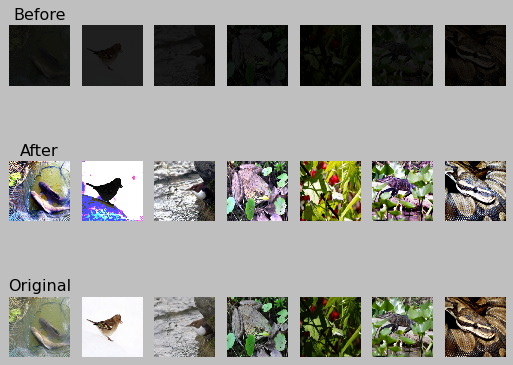

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2023-03-24 12:25:53.114566: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-24 12:25:53.321687: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-03-24 12:25:54.020897: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/jon/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-03-24 12:25:54.021180: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load 

Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc1         │    0.6742968559265137     │
│         test_acc5         │    0.8799999952316284     │
│         test_loss         │    1.9849025011062622     │
└───────────────────────────┴───────────────────────────┘

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc1         │    0.7373437285423279     │
│         test_acc5         │    0.9178125262260437     │
│         test_loss         │    1.6667743921279907     │
└───────────────────────────┴───────────────────────────┘

In [7]:
prep.reset_trans()
imgnet_dark = prep.luminance(1/8).get_loader()
imgnet_dark_histeq = prep.hist_eq().get_loader()

sample_dark = sample_imgs(imgnet_dark, preview_img_slice)
sample_dark_histeq = sample_imgs(imgnet_dark_histeq, preview_img_slice)
View.compare3_color(sample_dark, sample_dark_histeq, sample_orig)

# test model on dark images and histeq
result_dark = trainer.test(resnet50, imgnet_dark)
result_dark_histeq = trainer.test(resnet50, imgnet_dark_histeq)

##### Test Histogram Eq on Bright Images

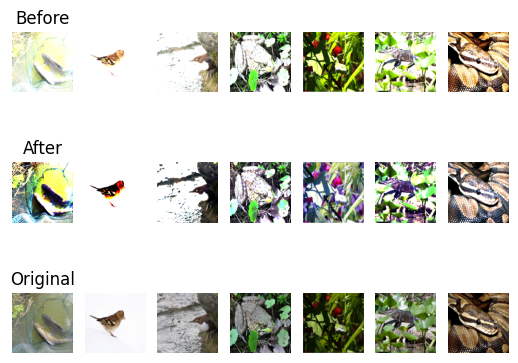

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc1         │    0.7169530987739563     │
│         test_acc5         │    0.9042187333106995     │
│         test_loss         │    1.7603471279144287     │
└───────────────────────────┴───────────────────────────┘

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc1         │    0.6700780987739563     │
│         test_acc5         │    0.8732030987739563     │
│         test_loss         │     1.929749608039856     │
└───────────────────────────┴───────────────────────────┘

In [9]:

prep.reset_trans()
imgnet_bright = prep.luminance(2).get_loader()
imgnet_bright_histeq = prep.hist_eq().get_loader()

sample_bright = sample_imgs(imgnet_bright, preview_img_slice)
sample_bright_histeq = sample_imgs(imgnet_bright_histeq, preview_img_slice)

View.compare3_color(sample_bright, sample_bright_histeq, sample_orig)

# test model on bright images and histeq
result_bright = trainer.test(resnet50, imgnet_bright)
result_bright_histeq = trainer.test(resnet50, imgnet_bright_histeq)

##### Test Histogram Eq on Low Contrast Images

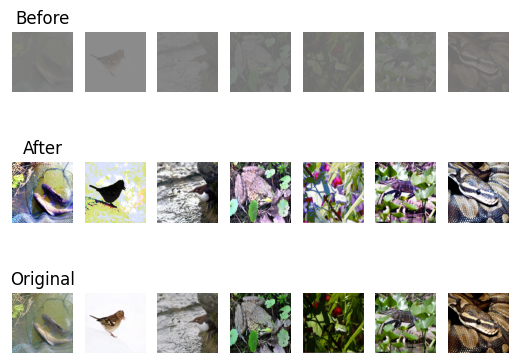

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc1         │    0.6464062333106995     │
│         test_acc5         │    0.8573437333106995     │
│         test_loss         │    2.1053824424743652     │
└───────────────────────────┴───────────────────────────┘

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc1         │    0.7310156226158142     │
│         test_acc5         │    0.9104687571525574     │
│         test_loss         │    1.7064921855926514     │
└───────────────────────────┴───────────────────────────┘

In [10]:
prep.reset_trans()
imgnet_low_contrast = prep.brightness_contrast(0, 0.1).get_loader()
imgnet_low_contrast_histeq = prep.hist_eq().get_loader()

sample_low_contrast = sample_imgs(imgnet_low_contrast, preview_img_slice)
sample_low_contrast_histeq = sample_imgs(imgnet_low_contrast_histeq, preview_img_slice)

View.compare3_color(sample_low_contrast, sample_low_contrast_histeq, sample_orig)

result_low_contrast = trainer.test(resnet50, imgnet_low_contrast)
result_low_contrast_histeq = trainer.test(resnet50, imgnet_low_contrast_histeq)

##### Test Retinex on low contrast images

@measure_time: retinex_MSRCP took 0.026521682739257812 seconds
@measure_time: retinex_MSRCP took 0.02603435516357422 seconds
@measure_time: retinex_MSRCP took 0.02581000328063965 seconds
@measure_time: retinex_MSRCP took 0.025767087936401367 seconds
@measure_time: retinex_MSRCP took 0.026064395904541016 seconds
@measure_time: retinex_MSRCP took 0.02589893341064453 seconds
@measure_time: retinex_MSRCP took 0.02608513832092285 seconds
@measure_time: retinex_MSRCP took 0.026242971420288086 seconds


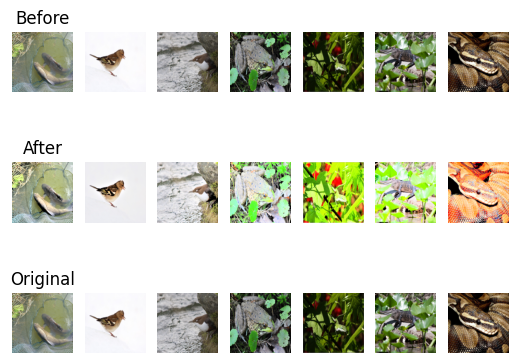

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2023-03-24 12:20:21.845683: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-24 12:20:22.109060: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-03-24 12:20:22.670952: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/jon/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-03-24 12:20:22.671011: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load 

Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc1         │    0.7768750190734863     │
│         test_acc5         │    0.9437500238418579     │
│         test_loss         │    1.5022457838058472     │
└───────────────────────────┴───────────────────────────┘

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


@measure_time: retinex_MSRCP took 0.07105827331542969 seconds
@measure_time: retinex_MSRCP took 0.0744163990020752 seconds@measure_time: retinex_MSRCP took 0.07194757461547852 seconds

@measure_time: retinex_MSRCP took 0.07524228096008301 seconds@measure_time: retinex_MSRCP took 0.07689952850341797 seconds@measure_time: retinex_MSRCP took 0.07532310485839844 seconds


@measure_time: retinex_MSRCP took 0.04678606986999512 seconds
@measure_time: retinex_MSRCP took 0.0475621223449707 seconds
@measure_time: retinex_MSRCP took 0.061441659927368164 seconds
@measure_time: retinex_MSRCP took 0.060671329498291016 seconds
@measure_time: retinex_MSRCP took 0.0634009838104248 seconds
@measure_time: retinex_MSRCP took 0.06362557411193848 seconds
@measure_time: retinex_MSRCP took 0.0587620735168457 seconds
@measure_time: retinex_MSRCP took 0.0519556999206543 seconds@measure_time: retinex_MSRCP took 0.04620766639709473 seconds

@measure_time: retinex_MSRCP took 0.05860567092895508 seconds
@measure_ti

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fccd25afa30>
Traceback (most recent call last):
  File "/home/jon/.local/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/home/jon/.local/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1443, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.10/multiprocessing/process.py", line 149, in join
    res = self._popen.wait(timeout)
  File "/usr/lib/python3.10/multiprocessing/popen_fork.py", line 40, in wait
    if not wait([self.sentinel], timeout):
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 931, in wait
    ready = selector.select(timeout)
  File "/usr/lib/python3.10/selectors.py", line 416, in select
    fd_event_list = self._selector.poll(timeout)
KeyboardInterrupt: 


Testing: 0it [00:00, ?it/s]

@measure_time: retinex_MSRCP took 0.05312490463256836 seconds
@measure_time: retinex_MSRCP took 0.059088706970214844 seconds
@measure_time: retinex_MSRCP took 0.07295417785644531 seconds@measure_time: retinex_MSRCP took 0.07361531257629395 seconds@measure_time: retinex_MSRCP took 0.07379817962646484 seconds@measure_time: retinex_MSRCP took 0.07174324989318848 seconds@measure_time: retinex_MSRCP took 0.07276177406311035 seconds




@measure_time: retinex_MSRCP took 0.0739445686340332 seconds
@measure_time: retinex_MSRCP took 0.057036399841308594 seconds
@measure_time: retinex_MSRCP took 0.04443693161010742 seconds
@measure_time: retinex_MSRCP took 0.047801971435546875 seconds@measure_time: retinex_MSRCP took 0.0481112003326416 seconds

@measure_time: retinex_MSRCP took 0.06028413772583008 seconds
@measure_time: retinex_MSRCP took 0.053254127502441406 seconds@measure_time: retinex_MSRCP took 0.05464053153991699 seconds

@measure_time: retinex_MSRCP took 0.048471927642822266 seconds
@meas

In [7]:
prep.reset_trans()
imgnet_low_contrast = prep.brightness_contrast(0, 1).get_loader()
imgnet_low_contrast_retinex = prep.retinex().get_loader()

sample_low_contrast = sample_imgs(imgnet_low_contrast, preview_img_slice)
sample_low_contrast_retinex = sample_imgs(imgnet_low_contrast_retinex, preview_img_slice)

View.compare3_color(sample_low_contrast, sample_low_contrast_retinex, sample_orig)

result_low_contrast = trainer.test(resnet50, imgnet_low_contrast)
result_low_contrast_retinex = trainer.test(resnet50, imgnet_low_contrast_retinex)